# **Aprendizaje no supervisado.**



### **Importamos las librerías y cargamos los datos.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Vamos a usar un dataset donde se calcularon 5 métricas de personalidades de twitter según una metodología del campo de la psicología conocido como “Ocean: The Big Five”

In [ ]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/RacoFernandez/python-ciencias-sociales/main/clase-viii/analisis.csv")

Las variables del dataset son:
- usuario (el nombre en Twitter)
- “op” - Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
- “co” - Conscientiousness – grado de orden, prolijidad, organización
- “ex” - Extraversion – grado de timidez, solitario o participación ante el grupo social
- “ag” - Agreeableness – grado de empatía con los demás, temperamento
- “ne” -  Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
- wordcount – Cantidad promedio de palabras usadas en sus tweets
- categoria – Actividad laboral del usuario (actor, cantante, etc.)

In [ ]:
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [ ]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


#El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

1. Actor/actriz
2. Cantante
3. Modelo
4. Tv, series
5. Radio
6. Tecnología
7. Deportes
8. Politica
9. Escritor/a

In [ ]:
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


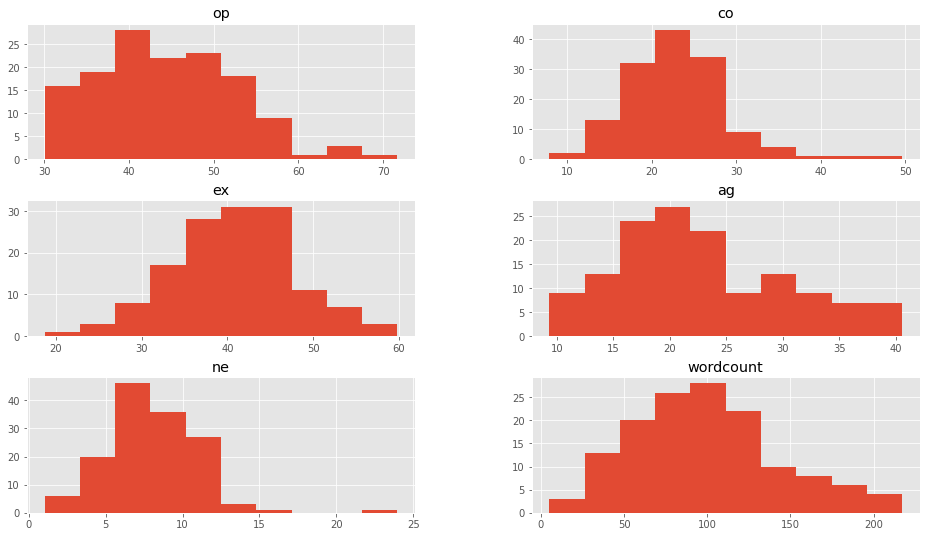

In [ ]:
dataframe.drop(['categoria'],1).hist()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


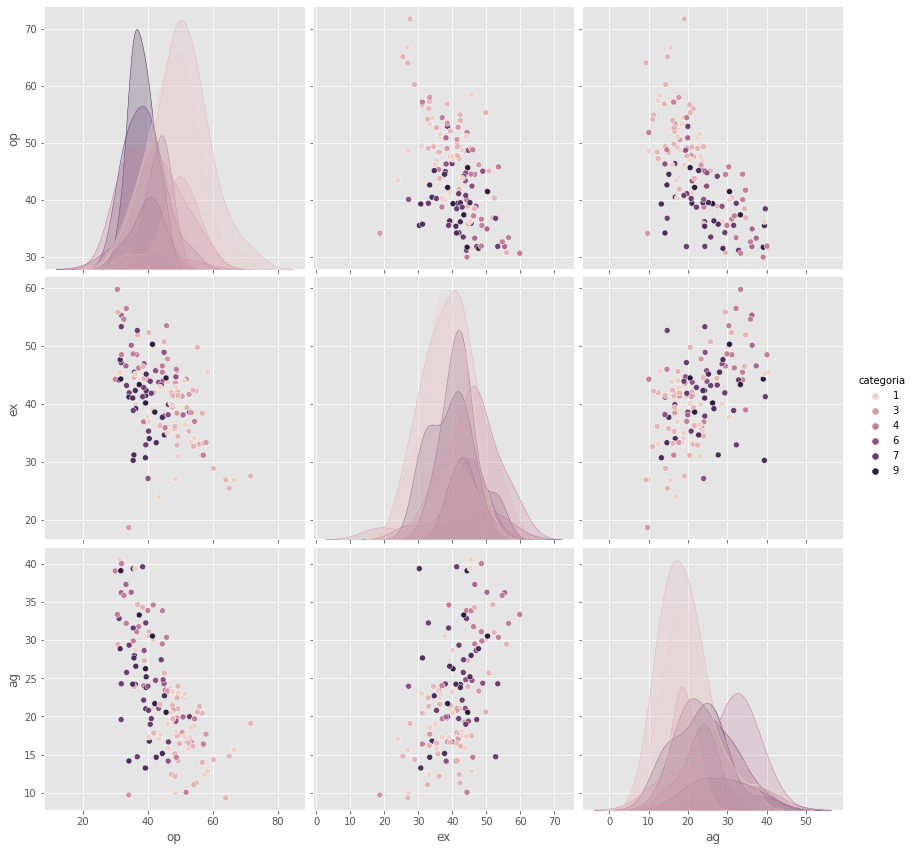

In [ ]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

### **Clusters no jerárquicos o de partición**
# k-means

In [ ]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

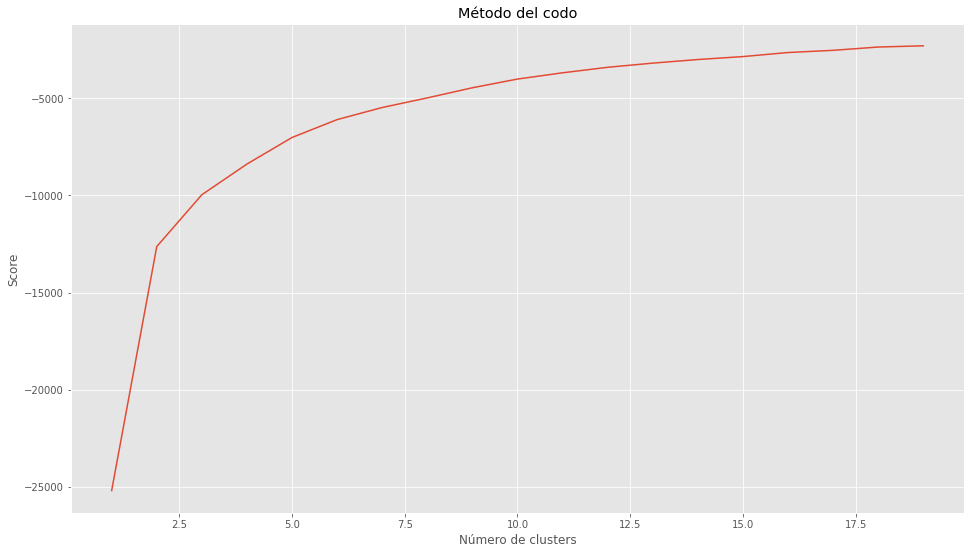

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.title('Método del codo')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[58.70462307 30.53566167 15.72207033]
 [35.90241306 47.56828232 33.58748762]
 [50.42588653 40.66723528 17.30892462]
 [40.14744474 43.54690971 23.11790265]
 [42.75925435 32.7509888  21.08881555]]


In [ ]:
# Calculando los clusters
labels = kmeans.predict(X)
# Obtengo los centroides del cluster
C = kmeans.cluster_centers_
#Asigno colores a cada grupo de clsters
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

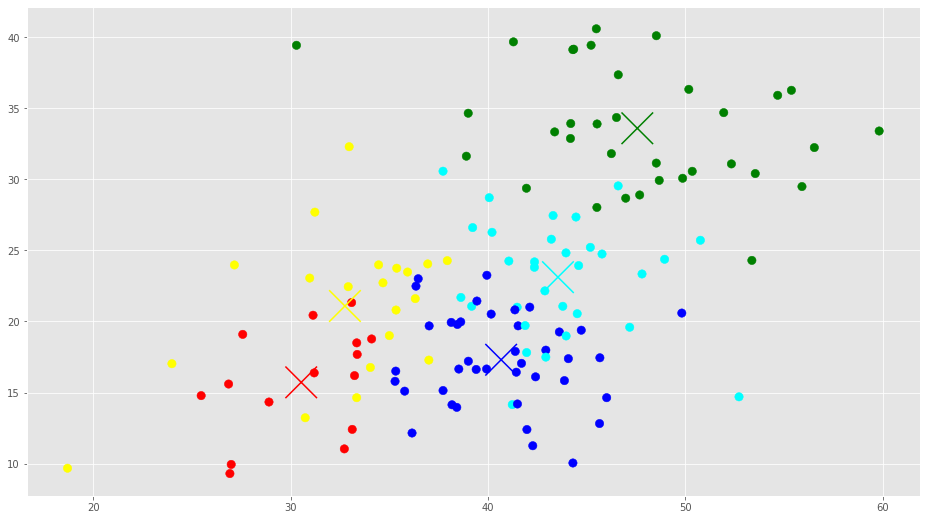

In [ ]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='x', c=colores, s=1000)
plt.show()

In [ ]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,15
1,green,34
2,blue,40
3,cyan,31
4,yellow,20


In [ ]:
cat_label=copy.groupby(['categoria', 'label']).count()
cat_label=cat_label.reset_index()
cat_label.columns=['categoria_original', 'label_cluster', 'cantidad']
cat_label

,categoria_original,label_cluster,cantidad
0,1,0,5
1,1,1,3
2,1,2,10
3,1,3,4
4,1,4,5
5,2,0,8
6,2,1,4
7,2,2,15
8,2,3,4
9,2,4,3


In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 82,  98,  21,  64, 120])

In [ ]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

JudgeJudy
maria_patino
carmenelectra
ierrejon
SarahPalinUSA


In [ ]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[3]


### **Clusters jerárquicos**

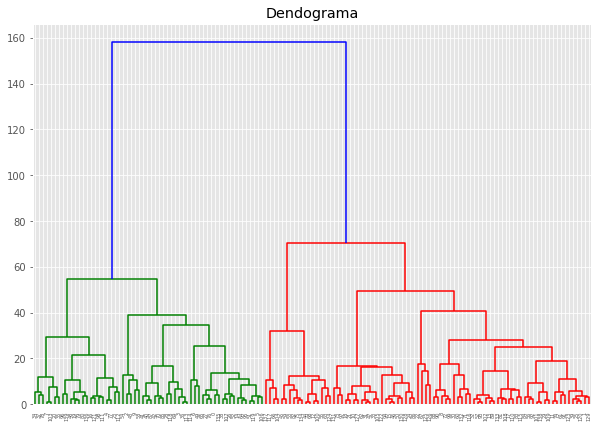

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendograma")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 0, 1, 1, 3, 1, 1, 3, 0, 1, 4, 0, 2, 0, 1, 4, 3, 0, 4, 3, 3, 4,
       0, 3, 4, 0, 1, 1, 1, 0, 0, 4, 0, 4, 3, 3, 1, 3, 1, 0, 1, 1, 1, 1,
       2, 2, 4, 4, 3, 1, 4, 1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 0, 4, 2, 1, 1,
       2, 0, 2, 1, 1, 0, 0, 4, 0, 2, 1, 3, 3, 3, 3, 0, 2, 0, 0, 1, 4, 1,
       0, 0, 0, 0, 0, 0, 4, 1, 3, 4, 3, 0, 2, 0, 0, 3, 2, 4, 1, 1, 0, 0,
       0, 3, 3, 1, 1, 0, 0, 2, 1, 1, 0, 3, 4, 0, 2, 0, 0, 4, 4, 0, 4, 4,
       0, 0, 2, 1, 3, 2, 0, 3])

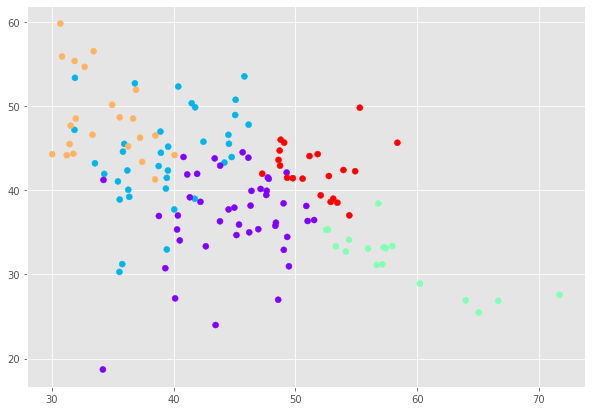

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')